In [107]:
import numpy as np
import matplotlib.pyplot as plt

plt.ion()

In [108]:
def discrete_filter(bel,u):
    """
    Calculate the new belief Bel(x)
    
    Arguments:
        bel - current belief of robot position x
        u -   move command -1=backward, 1=forward
    """
    
    bel_prime = np.zeros(bel.shape[0])
    
    if u == 1:
        for x in range(bel.shape[0]):
            if x>= 2:
                bel2 = bel[x-2]
            else:
                bel2 = 0
            if x>= 1:
                bel1 = bel[x-1]
            else:
                bel1 = 0
            bel0 = bel[x]
            
            if x < bel.shape[0]-1:
                bel_prime[x] = 0.25*bel2 + 0.50*bel1 + 0.25*bel0
            elif x == bel.shape[0]-1:
                bel_prime[x] = 0.25*bel2 + 0.75*bel1 + 1.00*bel0
                
    if u == -1:
        for x in range(bel.shape[0]):
            if x < bel.shape[0]-2:
                bel2 = bel[x+2]
            else:
                bel2 = 0
            if x < bel.shape[0]-1:
                bel1 = bel[x+1]
            else:
                bel1 = 0
            bel0 = bel[x]
            
            if x > 0:
                bel_prime[x] = 0.25*bel2 + 0.50*bel1 + 0.25*bel0
            elif x == 0:
                bel_prime[x] = 0.25*bel2 + 0.75*bel1 + 1.00*bel0
            
    print(bel_prime)
    
    return bel_prime

In [109]:
def plot_histogram(bel):
    plt.cla()
    plt.bar(range(0, bel.shape[0]), bel, width=1.0)
    plt.axis([0, bel.shape[0], 0, 1])
    plt.draw()
    plt.pause(1)

In [112]:
def main():
    bel = np.hstack((np.zeros(9),1,np.zeros(10)))
    
    plt.figure()
    plt.ion()
    plt.show()
    
    for i in range(0,9):
        plot_histogram(bel)
        bel = discrete_filter(bel,1)
        
    for i in range(0,3):
        plot_histogram(bel)
        bel = discrete_filter(bel,-1)
        
    plt.ioff()
    plt.show()
    
    #print(bel)
    #print(bel.shape)

<Figure size 640x480 with 0 Axes>

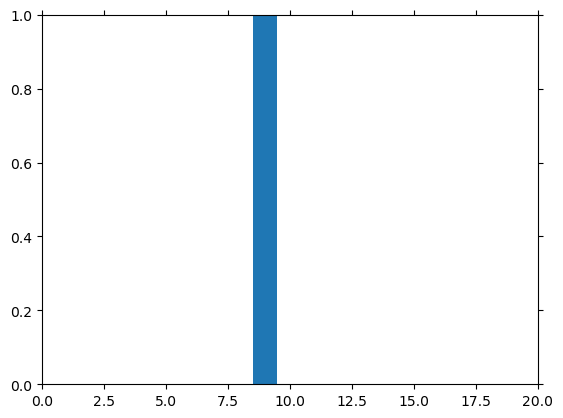

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.5  0.25 0.   0.
 0.   0.   0.   0.   0.   0.  ]


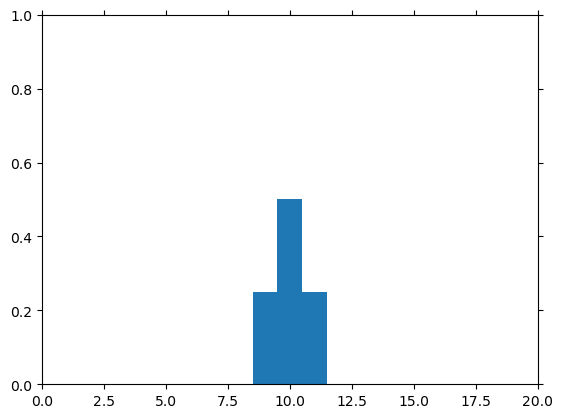

[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.0625
 0.25   0.375  0.25   0.0625 0.     0.     0.     0.     0.     0.    ]


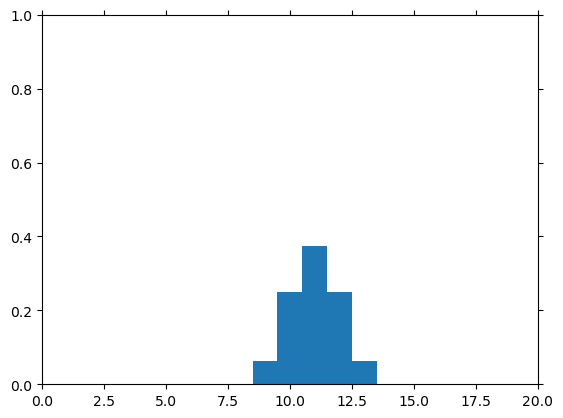

[0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.015625 0.09375  0.234375 0.3125   0.234375 0.09375  0.015625
 0.       0.       0.       0.      ]


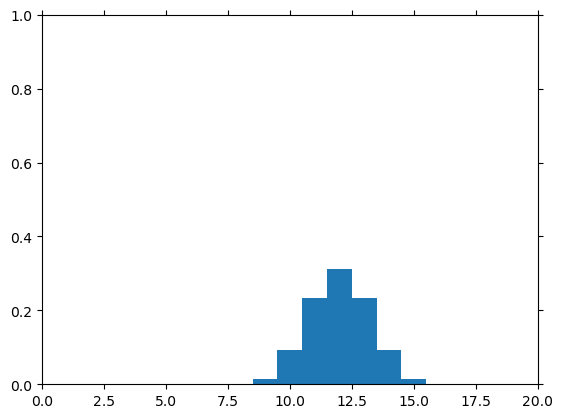

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00390625 0.03125    0.109375
 0.21875    0.2734375  0.21875    0.109375   0.03125    0.00390625
 0.         0.        ]


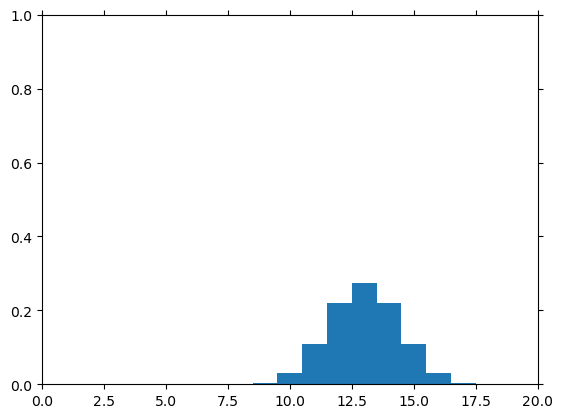

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00097656 0.00976562 0.04394531
 0.1171875  0.20507812 0.24609375 0.20507812 0.1171875  0.04394531
 0.00976562 0.00097656]


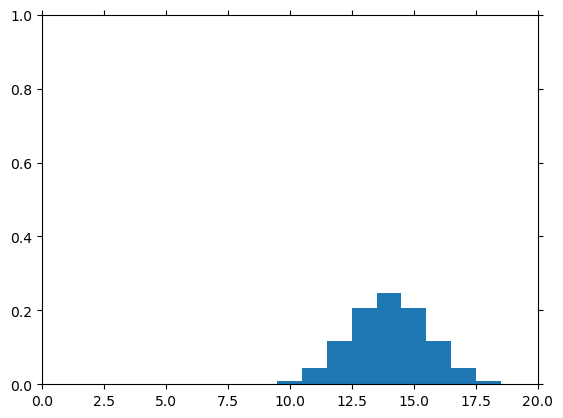

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00024414 0.00292969 0.01611328
 0.05371094 0.12084961 0.19335938 0.22558594 0.19335938 0.12084961
 0.05371094 0.01928711]


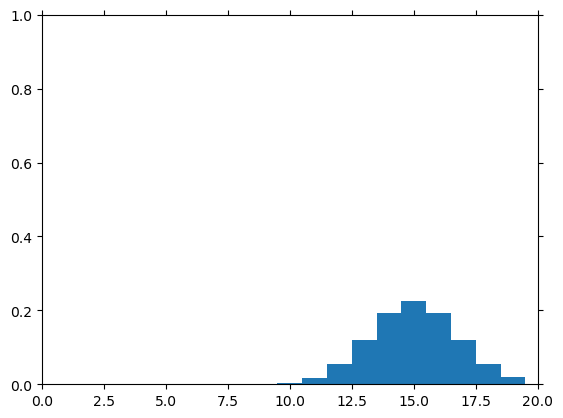

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.10351562e-05 8.54492188e-04 5.55419922e-03
 2.22167969e-02 6.10961914e-02 1.22192383e-01 1.83288574e-01
 2.09472656e-01 1.83288574e-01 1.22192383e-01 8.97827148e-02]


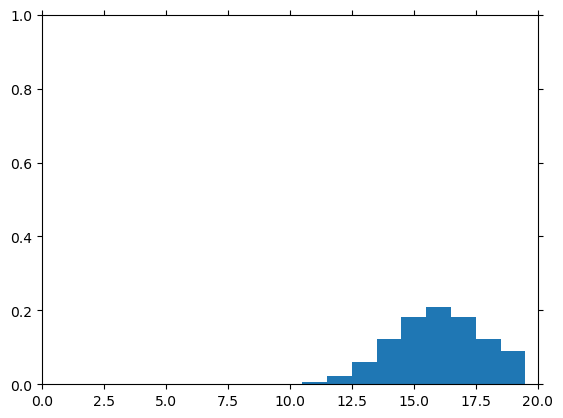

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.52587891e-05 2.44140625e-04 1.83105469e-03
 8.54492188e-03 2.77709961e-02 6.66503906e-02 1.22192383e-01
 1.74560547e-01 1.96380615e-01 1.74560547e-01 2.27249146e-01]


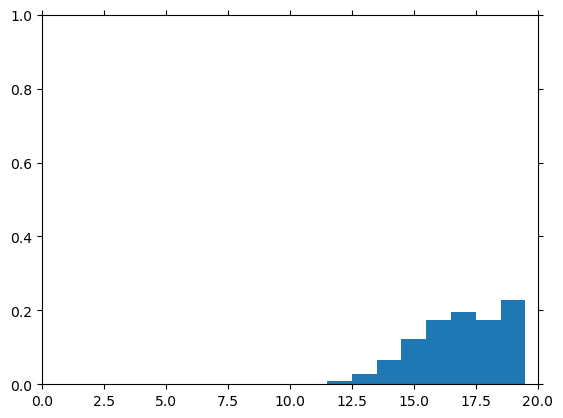

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.81469727e-06 6.86645508e-05 5.83648682e-04
 3.11279297e-03 1.16729736e-02 3.26843262e-02 7.08160400e-02
 1.21398926e-01 1.66923523e-01 1.85470581e-01 4.07264709e-01]


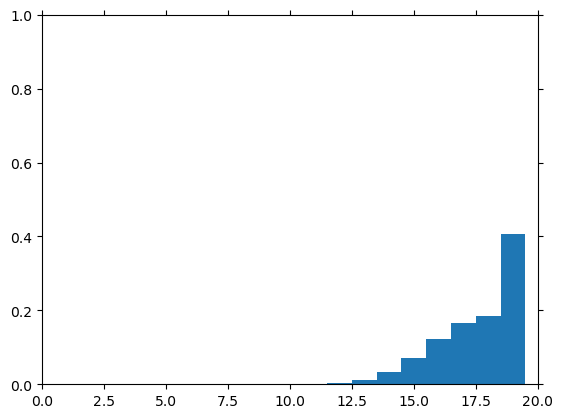

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.53674316e-07
 1.90734863e-05 1.81198120e-04 1.08718872e-03 4.62055206e-03
 1.47857666e-02 3.69644165e-02 7.39288330e-02 1.20134354e-01
 1.60179138e-01 2.36282349e-01 2.50000000e-01 1.01816177e-01]


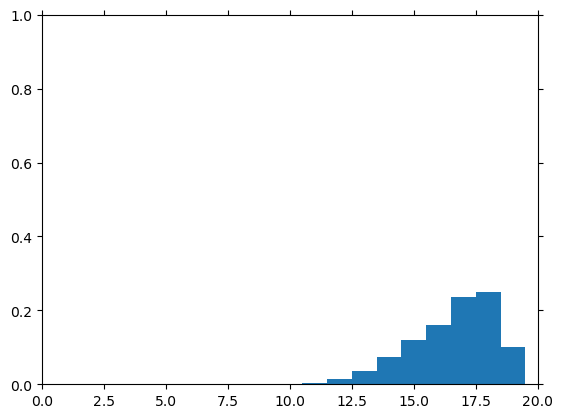

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.38418579e-07 5.24520874e-06 5.50746918e-05
 3.67164612e-04 1.74403191e-03 6.27851486e-03 1.77891254e-02
 4.06608582e-02 7.62391090e-02 1.18594170e-01 1.69193745e-01
 2.20685959e-01 2.09524632e-01 1.13408089e-01 2.54540443e-02]


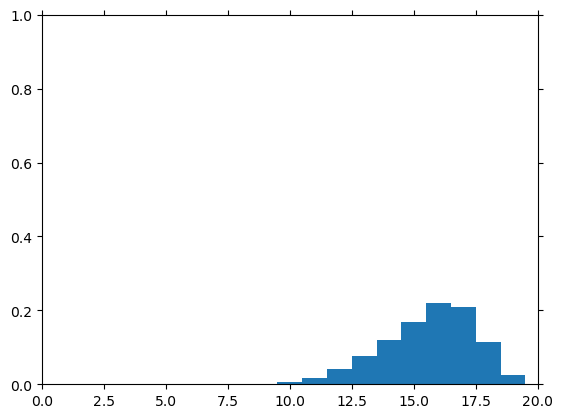

[0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96046448e-08
 1.43051147e-06 1.64508820e-05 1.20639801e-04 6.33358955e-04
 2.53343582e-03 8.02254677e-03 2.06294060e-02 4.38374877e-02
 7.79333115e-02 1.20655298e-01 1.69416904e-01 2.05022573e-01
 1.88285828e-01 1.15448713e-01 4.10790443e-02 6.36351109e-03]


In [113]:
if __name__ == "__main__":
    main()